# ML Tutorial Day 17

## K Nearest Neighbours Classification Algorithm

KNN uses the K nearest neighbours of the datapoint to decide which cluster the datapoint belongs to.

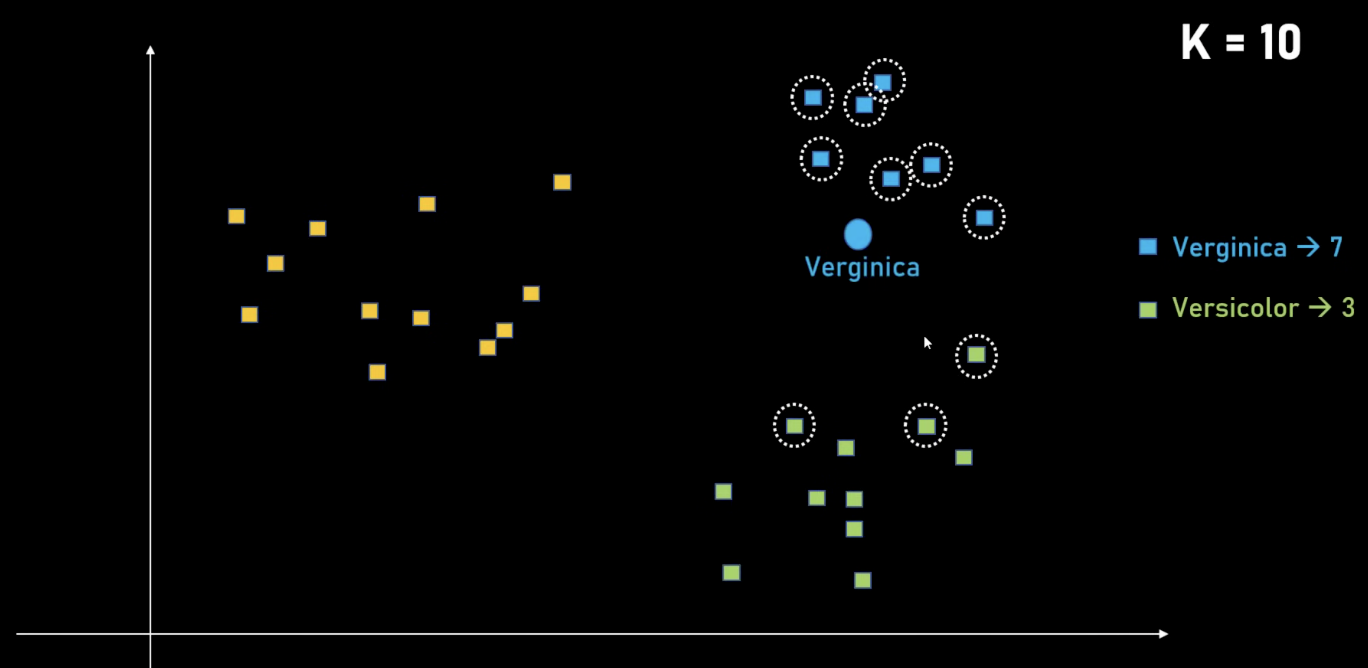

If we look at the above example, we see that, if we fix the value of K to be 10, then the blue circle has 7 neighbours from the Verginica cluster, and thus, we conclude that it falls in the Virginica cluster.

We should be careful that K should lie in a sweet spot, if its too high or too low, it might misclassify the datapoint.

In [51]:
# importing the dataset
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [52]:
# loading in a dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
# adding the target column
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


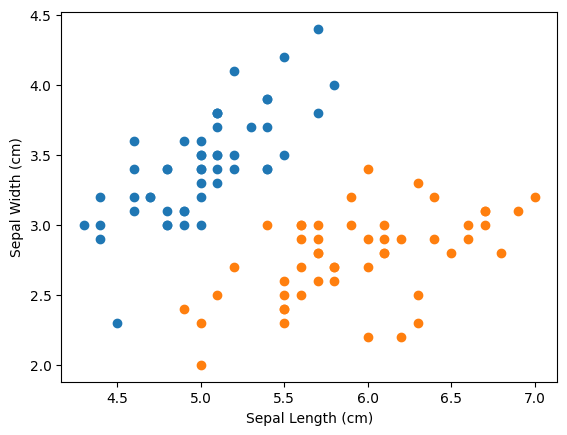

In [54]:
# now to visualize, we will construct three different datasets

df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

Looking at the above plot, we are sure that we can use KNN to classify a new datapoint.

In [55]:
# preparing training-testing data
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(df.drop(['target'], axis = 1), df['target'], test_size = 0.2)

y_train

144    2
149    2
125    2
148    2
138    2
      ..
10     0
26     0
101    2
117    2
47     0
Name: target, Length: 120, dtype: int64

In [56]:
# creating KNN classifier
from sklearn.neighbors import KNeighborsClassifier as KNN
knc = KNN(n_neighbors = 10)

# fitting the data
knc.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
# model score on testing data
knc.score(X_test, y_test)

0.9666666666666667

In [58]:
# creating the confusion matrix
from sklearn.metrics import confusion_matrix
confm = confusion_matrix(knc.predict(X_test), y_test)
confm

array([[12,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  7]])

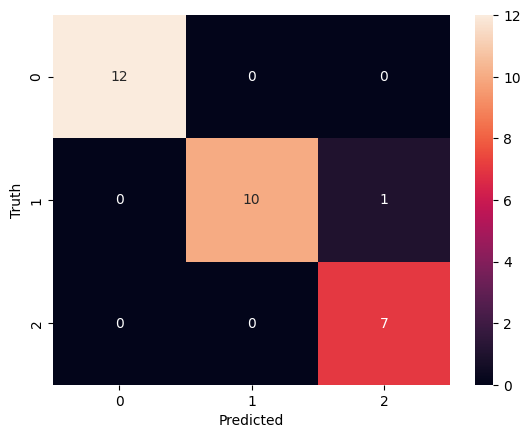

In [59]:
# visualizing the matrix
import seaborn as sn
sn.heatmap(confm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [60]:
# using classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, knc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

